# MSc Thesis - Hugo Stam

### Chapter 5.2 - Sensitivity Analyses

<img src="Figures/alternative_1.png"  style="width:500px">
<img src="Figures/alternative_2A.png" style="width:600px">
<img src="Figures/alternative_3.png"  style="width:600px">

In [1]:
# packages for data handling
import numpy as np
import pandas as pd

# packages for figures
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Jupyter Widgets
from IPython.display import Javascript, display
from ipywidgets import widgets

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

#display dfs side by side
from IPython.core.display import HTML

def multi_table(table_list):
    return HTML('<table><tr style="background-color:white;">' + 
                ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) + '</tr></table>')

In [2]:
cmap_tab20c = plt.get_cmap("tab20c")
cmap_tab20 = plt.get_cmap("tab20")
cmap_tab10 = plt.get_cmap("tab10")

pal_0 = cmap_tab20c(np.array([0, 4, 8]))
pal_1 = cmap_tab20c(np.array([1, 5, 9]))
pal_2 = cmap_tab20c(np.array([2, 6, 10]))

pal_1a = cmap_tab20c(np.array([2, 1, 0]))
pal_2a = cmap_tab20c(np.array([6, 5, 4]))
pal_3a = cmap_tab20c(np.array([10, 9, 8]))

pal_1b = cmap_tab20c(np.array([0, 1, 3]))
pal_2b = cmap_tab20c(np.array([4, 5, 7]))
pal_3b = cmap_tab20c(np.array([8, 9, 11]))

## Sensitivity: Demand

In [3]:
%store -r PV_alt1_12500_250000
%store -r PV_alt1_12500_500000
%store -r PV_alt1_12500_1000000
%store -r PV_alt1_12500_1500000
%store -r PV_alt1_12500_2000000
%store -r PV_alt1_12500_2500000

%store -r PV_alt2_40_12500_250000
%store -r PV_alt2_40_12500_500000
%store -r PV_alt2_40_12500_1000000
%store -r PV_alt2_40_12500_1500000
%store -r PV_alt2_40_12500_2000000
%store -r PV_alt2_40_12500_2500000

%store -r PV_alt3_40_12500_250000
%store -r PV_alt3_40_12500_500000
%store -r PV_alt3_40_12500_1000000
%store -r PV_alt3_40_12500_1500000
%store -r PV_alt3_40_12500_2000000
%store -r PV_alt3_40_12500_2500000

In [4]:
PVs = [['Onshore',  500000, PV_alt1_12500_500000],
       ['Onshore', 1000000, PV_alt1_12500_1000000],
       ['Onshore', 1500000, PV_alt1_12500_1500000],
       ['Onshore', 2000000, PV_alt1_12500_2000000],
       ['Barge',    500000, PV_alt2_40_12500_500000],
       ['Barge',   1000000, PV_alt2_40_12500_1000000],
       ['Barge',   1500000, PV_alt2_40_12500_1500000],
       ['Barge',   2000000, PV_alt2_40_12500_2000000],
       ['Bridge',   500000, PV_alt3_40_12500_500000],
       ['Bridge',  1000000, PV_alt3_40_12500_1000000], 
       ['Bridge',  1500000, PV_alt3_40_12500_1500000], 
       ['Bridge',  2000000, PV_alt3_40_12500_2000000]]

PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Demand', 'PV']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)

def demand_scenario_table(df_):
    df = pd.DataFrame(index=["-50%","base","+50%","+100%"], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Demand"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:4]/10**6)
    df['Alt 2'] = list(df_.PV[4:8]/10**6)
    df['Alt 3'] = list(df_.PV[8:12]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    
    return df

df_demand = demand_scenario_table(PV_df)
display(df_demand)

PV [M USD],Alt 1,Alt 2,Alt 3
Demand,,,
-50%,"$ 4,022","$ 2,356","$ 4,164"
base,"$ 4,850","$ 4,147","$ 5,624"
+50%,"$ 5,758","$ 6,062","$ 7,328"
+100%,"$ 6,584","$ 7,813","$ 8,916"


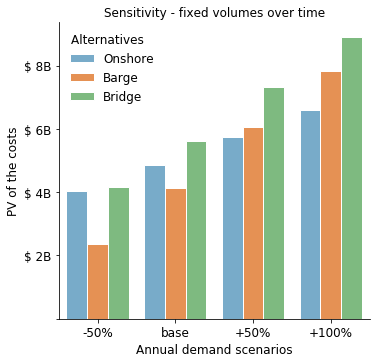

In [5]:
sns.factorplot(x="Demand", y="PV", hue="Alternative", data=PV_df, 
               kind="bar", edgecolor="white", palette=pal_1, legend=False)
sns.despine(right=True, top=True)

plt.title('Sensitivity - fixed volumes over time', fontsize='large')

plt.xlabel('Annual demand scenarios', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')

plt.xticks([0, 1, 2, 3], ["-50%","base","+50%","+100%"], fontsize='large')
plt.yticks(np.arange(0, 10*10**9, step = 2*10**9), ["","$ 2B","$ 4B","$ 6B","$ 8B"], fontsize='large')

plt.legend(title='Alternatives  ', title_fontsize='large', fontsize='large', loc='upper left', 
           framealpha=0.9, frameon=False)

plt.savefig("SaveFigures/bar_demand_1a.png", bbox_inches = 'tight')

In [6]:
PVs = [['Onshore',  500000, PV_alt1_12500_500000    / 500000/20],
       ['Onshore', 1000000, PV_alt1_12500_1000000   /1000000/20],
       ['Onshore', 1500000, PV_alt1_12500_1500000   /1500000/20],
       ['Onshore', 2000000, PV_alt1_12500_2000000   /2000000/20],
       ['Barge',    500000, PV_alt2_40_12500_500000 / 500000/20],
       ['Barge',   1000000, PV_alt2_40_12500_1000000/1000000/20],
       ['Barge',   1500000, PV_alt2_40_12500_1500000/1500000/20],
       ['Barge',   2000000, PV_alt2_40_12500_2000000/2000000/20],
       ['Bridge',   500000, PV_alt3_40_12500_500000 / 500000/20],
       ['Bridge',  1000000, PV_alt3_40_12500_1000000/1000000/20], 
       ['Bridge',  1500000, PV_alt3_40_12500_1500000/1500000/20], 
       ['Bridge',  2000000, PV_alt3_40_12500_2000000/2000000/20]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Demand', 'PV per TEU']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)

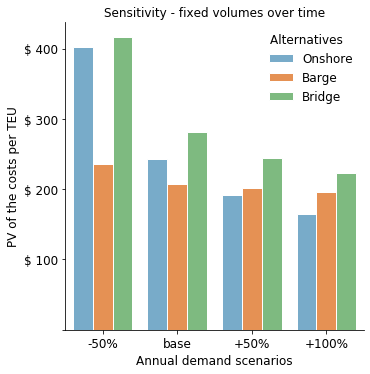

In [7]:
sns.factorplot(x="Demand", y="PV per TEU", hue="Alternative", data=PV_df, 
               kind="bar", edgecolor="white", palette=pal_1, legend=False)
sns.despine(right=True, top=True)

plt.title('Sensitivity - fixed volumes over time', fontsize='large')
plt.xlabel('Annual demand scenarios', fontsize='large')
plt.ylabel('PV of the costs per TEU', fontsize='large')

plt.xticks([0, 1, 2, 3], ["-50%","base","+50%","+100%"], fontsize='large')
plt.yticks(np.arange(0, 500, step = 100), ["","$ 100","$ 200","$ 300","$ 400"], fontsize='large')

plt.legend(title='Alternatives  ', title_fontsize='large', fontsize='large', loc='upper right', 
           framealpha=0.9, frameon=False)

plt.savefig("SaveFigures/bar_demand_1b.png", bbox_inches = 'tight')

## Sensitivity: Growing demand

In [8]:
%store -r PV_alt1_12500_1000000_growth0
%store -r PV_alt1_12500_1000000_growth1
%store -r PV_alt1_12500_1000000_growth2
%store -r PV_alt1_12500_1000000_growth3

%store -r PV_alt2_40_12500_1000000_growth0
%store -r PV_alt2_40_12500_1000000_growth1
%store -r PV_alt2_40_12500_1000000_growth2
%store -r PV_alt2_40_12500_1000000_growth3

%store -r PV_alt3_40_12500_1000000_growth0
%store -r PV_alt3_40_12500_1000000_growth1
%store -r PV_alt3_40_12500_1000000_growth2
%store -r PV_alt3_40_12500_1000000_growth3

In [9]:
PVs = [['Onshore', 1000000, PV_alt1_12500_1000000_growth0], 
       ['Onshore', 1500000, PV_alt1_12500_1000000_growth1], 
       ['Onshore', 2000000, PV_alt1_12500_1000000_growth2],
       ['Onshore', 2500000, PV_alt1_12500_1000000_growth3],
       ['Barge',   1000000, PV_alt2_40_12500_1000000_growth0], 
       ['Barge',   1500000, PV_alt2_40_12500_1000000_growth1], 
       ['Barge',   2000000, PV_alt2_40_12500_1000000_growth2],
       ['Barge',   2500000, PV_alt2_40_12500_1000000_growth3],
       ['Bridge',  1000000, PV_alt3_40_12500_1000000_growth0], 
       ['Bridge',  1500000, PV_alt3_40_12500_1000000_growth1], 
       ['Bridge',  2000000, PV_alt3_40_12500_1000000_growth2],
       ['Bridge',  2500000, PV_alt3_40_12500_1000000_growth3]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative','Demand', 'PV']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)

def growth_scenario_table(df_):
    df = pd.DataFrame(index=['--', 'low', 'base', 'high'], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Scenario"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:4]/10**6)
    df['Alt 2'] = list(df_.PV[4:8]/10**6)
    df['Alt 3'] = list(df_.PV[8:12]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    return df

df_growth_demand = growth_scenario_table(PV_df)
display(df_growth_demand)

PV [M USD],Alt 1,Alt 2,Alt 3
Scenario,,,
--,"$ 4,850","$ 4,147","$ 5,624"
low,"$ 5,274","$ 5,142","$ 6,387"
base,"$ 5,675","$ 6,056","$ 7,151"
high,"$ 6,059","$ 6,935","$ 7,913"


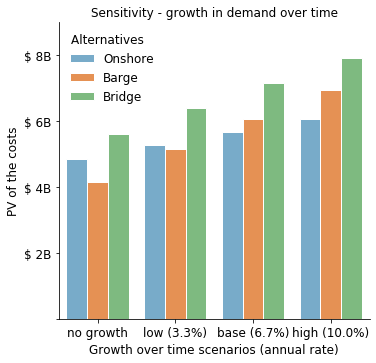

In [10]:
sns.factorplot(x="Demand", y="PV", hue="Alternative", data=PV_df, 
               kind="bar", edgecolor="white", palette=pal_1, legend=False)
sns.despine(right=True, top=True)

plt.title('Sensitivity - growth in demand over time', fontsize='large')
plt.xlabel('Growth over time scenarios (annual rate)', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')

plt.xticks([0, 1, 2, 3], ["no growth", "low (3.3%)", "base (6.7%)", "high (10.0%)"], size='large')
plt.yticks(np.arange(0, 10*10**9, step = 2*10**9), ["","$ 2B","$ 4B","$ 6B","$ 8B"], fontsize='large')

plt.ylim(0,9*10**9)
plt.legend(title='Alternatives  ', title_fontsize='large', fontsize='large', loc='upper left', 
           framealpha=0.9, frameon=False)

plt.savefig("SaveFigures/bar_demand_2a.png", bbox_inches = 'tight')

In [11]:
PVs = [['Onshore',                 1000000, PV_alt1_12500_1000000_growth0    / 1000000 / 20], 
       ['Onshore',                 1500000, PV_alt1_12500_1000000_growth1    / 1500000 / 20], 
       ['Onshore',                 2000000, PV_alt1_12500_1000000_growth2    / 2000000 / 20],
       ['Onshore',                 2500000, PV_alt1_12500_1000000_growth3    / 2500000 / 20],
       ['Barge',  1000000, PV_alt2_40_12500_1000000_growth0 / 1000000 / 20], 
       ['Barge',  1500000, PV_alt2_40_12500_1000000_growth1 / 1500000 / 20], 
       ['Barge',  2000000, PV_alt2_40_12500_1000000_growth2 / 2000000 / 20],
       ['Barge',  2500000, PV_alt2_40_12500_1000000_growth3 / 2500000 / 20],
       ['Bridge', 1000000, PV_alt3_40_12500_1000000_growth0 / 1000000 / 20], 
       ['Bridge', 1500000, PV_alt3_40_12500_1000000_growth1 / 1500000 / 20], 
       ['Bridge', 2000000, PV_alt3_40_12500_1000000_growth2 / 2000000 / 20],
       ['Bridge', 2500000, PV_alt3_40_12500_1000000_growth3 / 2500000 / 20]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative','Demand', 'PV per TEU']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)

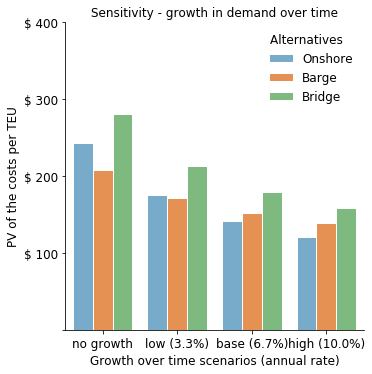

In [12]:
sns.factorplot(x="Demand", y="PV per TEU", hue="Alternative", data=PV_df, 
               kind="bar", edgecolor="white", palette=pal_1, legend=False)
sns.despine(right=True, top=True)

plt.title('Sensitivity - growth in demand over time', fontsize='large')
plt.xlabel('Growth over time scenarios (annual rate)', fontsize='large')
plt.ylabel('PV of the costs per TEU', fontsize='large')

plt.xticks([0, 1, 2, 3], ["no growth", "low (3.3%)", "base (6.7%)", "high (10.0%)"], size='large')
plt.yticks(np.arange(0, 500, step = 100), ["","$ 100","$ 200","$ 300","$ 400"], fontsize='large')

plt.legend(title='Alternatives  ', title_fontsize='large', fontsize='large', loc='upper right', 
           framealpha=0.9, frameon=False)

# save fig
plt.savefig("SaveFigures/bar_demand_2b.png", bbox_inches = 'tight')

## Sensitivity: Bathymetry

In [13]:
%store -r PV_alt1_12500_1000000_slope1
%store -r PV_alt1_12500_1000000_slope2
%store -r PV_alt1_12500_1000000_slope3

%store -r PV_alt2_40_12500_1000000_slope1
%store -r PV_alt2_40_12500_1000000_slope2
%store -r PV_alt2_40_12500_1000000_slope3

%store -r PV_alt3_40_12500_1000000_slope1
%store -r PV_alt3_40_12500_1000000_slope2
%store -r PV_alt3_40_12500_1000000_slope3

In [14]:
PVs = [['Onshore', 1.0, PV_alt1_12500_1000000_slope1],
       ['Onshore', 2.0, PV_alt1_12500_1000000_slope2],
       ['Onshore', 3.0, PV_alt1_12500_1000000_slope3],
       ['Barge',   1.0, PV_alt2_40_12500_1000000_slope1],
       ['Barge',   2.0, PV_alt2_40_12500_1000000_slope2],
       ['Barge',   3.0, PV_alt2_40_12500_1000000_slope3],
       ['Bridge',  1.0, PV_alt3_40_12500_1000000_slope1],
       ['Bridge',  2.0, PV_alt3_40_12500_1000000_slope2],
       ['Bridge',  3.0, PV_alt3_40_12500_1000000_slope3]]

PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Slope', 'PV']) 

In [15]:
def slope_scenario_table(df_):
    df = pd.DataFrame(index=['gentle', 'average', 'steep'], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Scenario"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:3]/10**6)
    df['Alt 2'] = list(df_.PV[3:6]/10**6)
    df['Alt 3'] = list(df_.PV[6:9]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    return df

df_slope = slope_scenario_table(PV_df)
display(df_slope)

PV [M USD],Alt 1,Alt 2,Alt 3
Scenario,,,
gentle,"$ 6,266","$ 4,361","$ 5,947"
average,"$ 4,850","$ 4,147","$ 5,624"
steep,"$ 3,435","$ 4,611","$ 5,869"


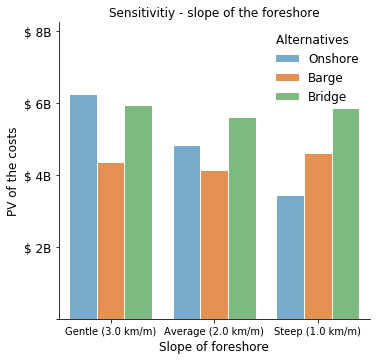

In [16]:
sns.factorplot(x="Slope", y="PV", hue="Alternative", data=PV_df, 
               kind="bar", edgecolor="white", palette=pal_1, legend=False)
sns.despine(right=True, top=True)

plt.title('Sensitivitiy - slope of the foreshore', fontsize='large')
plt.xlabel('Slope of foreshore', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')

plt.yticks(np.arange(0, 10*10**9, step = 2*10**9), ["","$ 2B","$ 4B","$ 6B","$ 8B"], fontsize='large')
plt.xticks([0, 1, 2], ["Gentle (3.0 km/m)","Average (2.0 km/m)","Steep (1.0 km/m)"])

plt.ylim(0,8.25*10**9)

plt.legend(title='Alternatives  ', title_fontsize='large', fontsize='large', loc='upper right', 
           framealpha=0.9, frameon=False)

# save fig
plt.savefig("SaveFigures/bar_bathymetry_1.png", bbox_inches = 'tight')

In [17]:
%store -r PV_alt1_12500_1000000_bathymetry50
%store -r PV_alt1_12500_1000000_bathymetry70
%store -r PV_alt1_12500_1000000_bathymetry90

%store -r PV_alt2_12500_1000000_bathymetry50
%store -r PV_alt2_12500_1000000_bathymetry70
%store -r PV_alt2_12500_1000000_bathymetry90

%store -r PV_alt3_12500_1000000_bathymetry50
%store -r PV_alt3_12500_1000000_bathymetry70
%store -r PV_alt3_12500_1000000_bathymetry90

In [18]:
PVs = [['Onshore', 1.0, PV_alt1_12500_1000000_bathymetry50],
       ['Onshore', 2.0, PV_alt1_12500_1000000_bathymetry70],
       ['Onshore', 3.0, PV_alt1_12500_1000000_bathymetry90],
       ['Barge',   1.0, PV_alt2_12500_1000000_bathymetry50],
       ['Barge',   2.0, PV_alt2_12500_1000000_bathymetry70],
       ['Barge',   3.0, PV_alt2_12500_1000000_bathymetry90],
       ['Bridge',  1.0, PV_alt3_12500_1000000_bathymetry50],
       ['Bridge',  2.0, PV_alt3_12500_1000000_bathymetry70],
       ['Bridge',  3.0, PV_alt3_12500_1000000_bathymetry90]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Bathymetry', 'PV']) 

In [19]:
def shape_scenario_table(df_):
    df = pd.DataFrame(index=['0.50', '0.70', '0.90'], columns=['Alt 1','Alt 2','Alt 3'])
    df.index.name = "Scenario"
    df.columns.name = "PV [M USD]"
    df['Alt 1'] = list(df_.PV[0:3]/10**6)
    df['Alt 2'] = list(df_.PV[3:6]/10**6)
    df['Alt 3'] = list(df_.PV[6:9]/10**6)
    df['Alt 1'] = df['Alt 1'].map('$ {:,.0f}'.format)
    df['Alt 2'] = df['Alt 2'].map('$ {:,.0f}'.format)
    df['Alt 3'] = df['Alt 3'].map('$ {:,.0f}'.format)
    return df

df_shape = shape_scenario_table(PV_df)
display(df_shape)

PV [M USD],Alt 1,Alt 2,Alt 3
Scenario,,,
0.50,"$ 4,850","$ 4,147","$ 5,624"
0.70,"$ 5,983","$ 4,169","$ 5,624"
0.90,"$ 7,115","$ 4,191","$ 5,624"


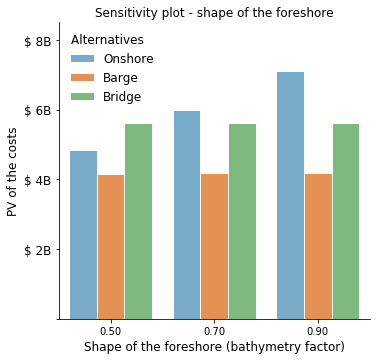

In [20]:
sns.factorplot(x="Bathymetry", y="PV", hue="Alternative", data=PV_df, 
               kind="bar", edgecolor="white", palette=pal_1, legend=False)
sns.despine(right=True, top=True)


plt.title('Sensitivity plot - shape of the foreshore', fontsize='large')
plt.xlabel('Shape of the foreshore (bathymetry factor)', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')

plt.yticks(np.arange(0, 10*10**9, step = 2*10**9), ["","$ 2B","$ 4B","$ 6B","$ 8B"], fontsize='large')
plt.xticks([0, 1, 2], ["0.50","0.70","0.90"])

plt.ylim(0,8.5*10**9)
plt.legend(title='Alternatives  ', title_fontsize='large', fontsize='large', loc='upper left', 
           framealpha=0.9, frameon=False)

# save fig
plt.savefig("SaveFigures/bar_bathymetry_2.png", bbox_inches = 'tight')